# EDA on Retail Dataset

> Idea: Exploratory Data Analysis (EDA) on Retail Sales Data

> Description:
The goal is to perform exploratory data analysis (EDA) to uncover patterns, trends, and insights that can help the retail business make informed decisions.

> Key Concepts and Challenges:
- Data Loading and Cleaning: Load the retail sales dataset.
- Descriptive Statistics: Calculate basic statistics (mean, median, mode, standard deviation).
- Time Series Analysis: Analyze sales trends over time using time series techniques.
- Customer and Product Analysis: Analyze customer demographics and purchasing behavior.
- Visualization: Present insights through bar charts, line plots, and heatmaps.
- Recommendations: Provide actionable recommendations based on the EDA.

> Objectives:
- Gain hands-on experience in data cleaning and exploratory data analysis.
- Develop skills in interpreting descriptive statistics and time series analysis.
- Learn to use data visualization for effective communication of insights.

> Done By - Shweta AT

### 1. Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 2. Loading and Reading the Dataset

In [2]:
df = pd.read_csv(r'C:\Users\atman\Downloads\retail_sales_dataset.csv')
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [4]:
df.shape

(1000, 9)

In [5]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

### 3. Descriptive Statistics

In [6]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


### Checking for Missing values

In [7]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

> There are no Missing Values present

### 4. EDA

In [8]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

#### 4.1 Customer Age Distribution

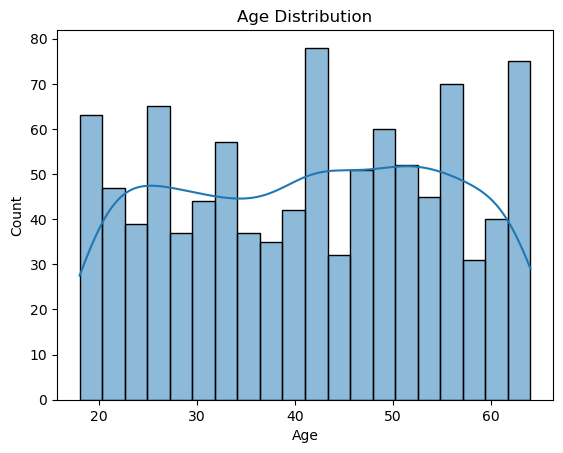

In [9]:
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

#### 4.2 Total Amount Distribution

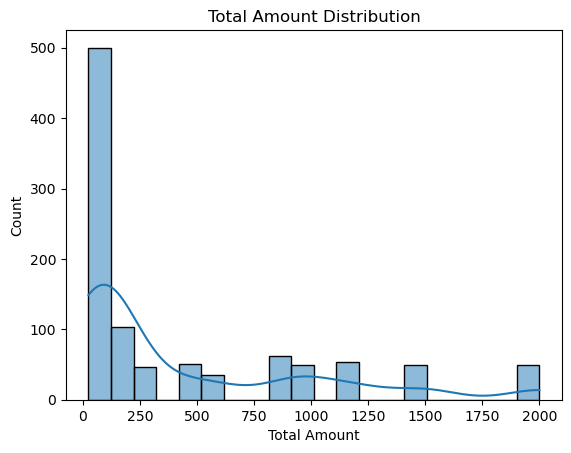

In [10]:
sns.histplot(df['Total Amount'], bins=20, kde=True)
plt.title('Total Amount Distribution')
plt.show()

### 5. Time Series Analysis

#### 5.1 Sales Trend Over Time

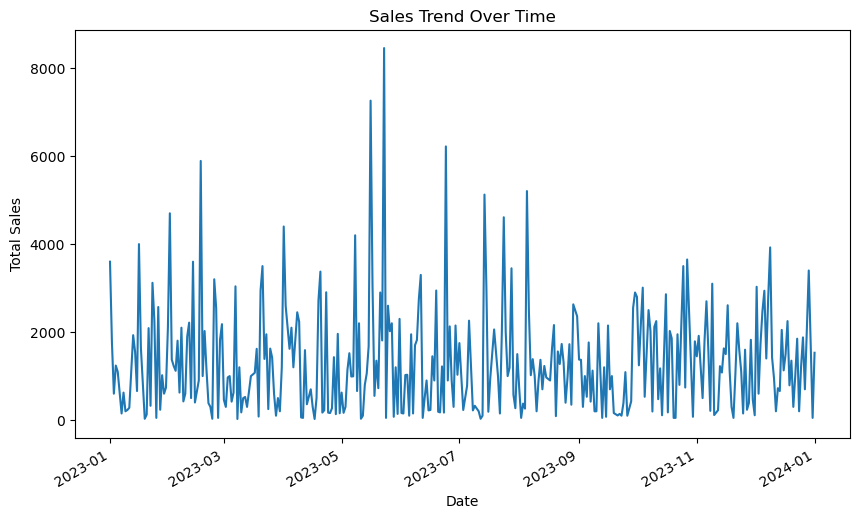

In [11]:
daily_sales = df.groupby('Date')['Total Amount'].sum()

daily_sales.plot(figsize=(10,6), title='Sales Trend Over Time')
plt.ylabel('Total Sales')
plt.show()

> Highest sales can be seen during the month between `2023-05` and `2023-07`

#### 5.2 Monthly Sales

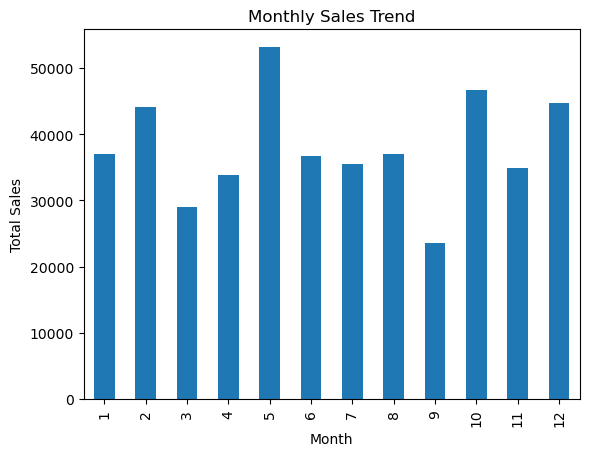

In [12]:
df['Month'] = df['Date'].dt.month
monthly_sales = df.groupby('Month')['Total Amount'].sum()
monthly_sales.plot(kind = 'bar',title = 'Monthly Sales Trend')
plt.ylabel('Total Sales')
plt.show()

> `Month 5 (May)` has the highest sales

#### 5.3 Gender Distribution

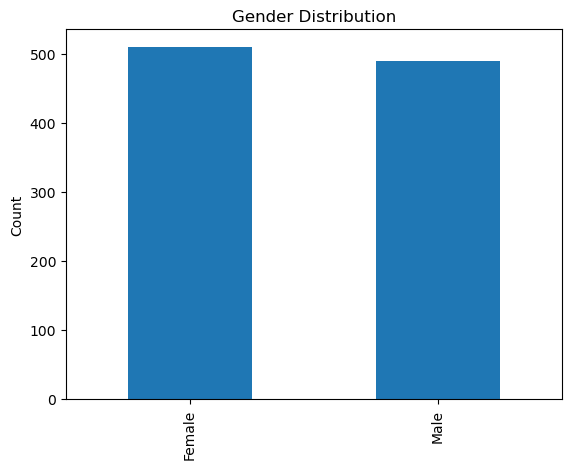

In [13]:
gender_counts = df['Gender'].value_counts()
gender_counts.plot(kind='bar', title='Gender Distribution')
plt.ylabel('Count')
plt.show()

> `Female` count is slightly higher than Male count

#### 5.4 Top Product Categories by Sales

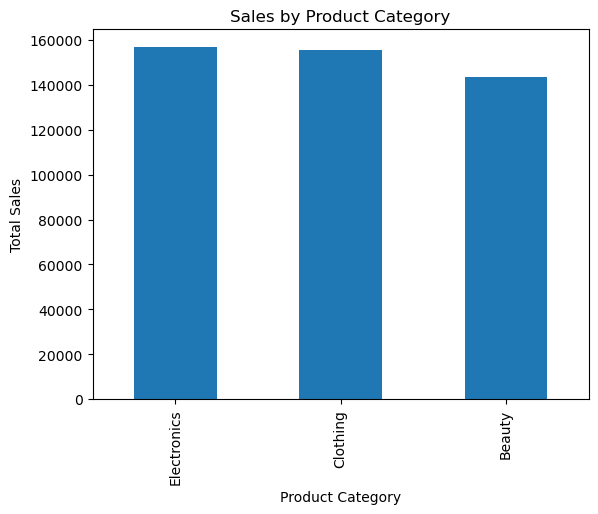

In [14]:
category_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar', title='Sales by Product Category')
plt.ylabel('Total Sales')
plt.show()

> `Electronics` product has higher sales followed by `Clothing` product and `Beauty`

#### 5.5 Average Purchase per Customer

In [15]:
customer_sales = df.groupby('Customer ID')['Total Amount'].sum()
print("Average Purchase per Customer:", customer_sales.mean())

Average Purchase per Customer: 456.0


#### 5.6 Correlation Heatmap

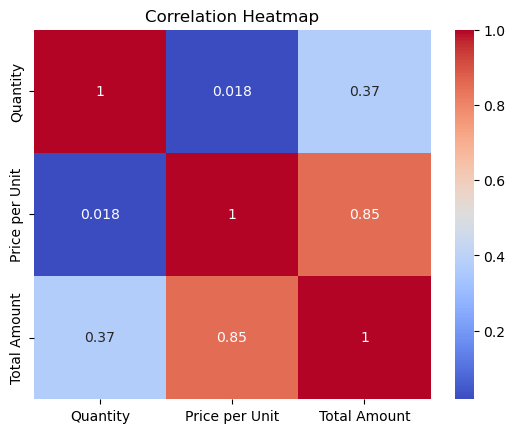

In [16]:
corr_matrix = df[['Quantity', 'Price per Unit', 'Total Amount']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

> highest Correlation between:
- Total Amount and Price per Unit = 0.85

#### 5.7 Sales by Age Group

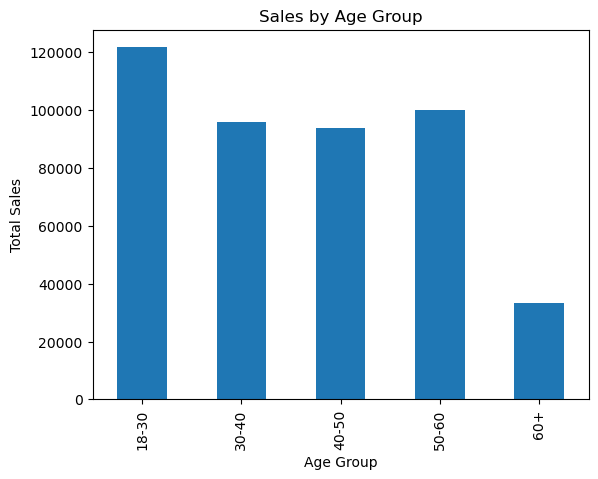

In [17]:
df['Age Group'] = pd.cut(df['Age'], bins=[18, 30, 40, 50, 60, 100], labels=['18-30', '30-40', '40-50', '50-60', '60+'])
age_group_sales = df.groupby('Age Group')['Total Amount'].sum()
age_group_sales.plot(kind='bar', title='Sales by Age Group')
plt.ylabel('Total Sales')
plt.show()

> Age Group between `18-30` years have highest total sales followed by age group between 50-60

## Recommendations

- Target Younger Audiences: Age group `18-30` contributes significantly to sales, focus on marketing strategies tailored to younger customers.
- Promote Best-Selling Categories: Invest more in product categories with the highest sales - `Electronics`.
- Increase Customer Engagement: Look for ways to increase the average purchase per customer, such as offering discounts for bulk purchases.